In [9]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [10]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df11 = pd.read_excel(data_path, sheet_name=11)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [11]:
# Make a new column 'Health_Status'
df = df11.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.082520,0.074894,0.077570,0.076694,0.072901,0.068020,0.064189,0.064137,...,0.034513,0.034363,0.034162,0.034015,0.033811,0.033612,0.033442,0.033342,0.033236,0.033117
1,Control,1,0.071731,0.070800,0.076329,0.070059,0.063814,0.061029,0.057822,0.057361,...,0.029874,0.029710,0.029649,0.029524,0.029425,0.029300,0.029136,0.029018,0.028916,0.028764
2,Control,1,0.086958,0.080480,0.082647,0.079270,0.075974,0.073213,0.067540,0.066175,...,0.028626,0.028447,0.028212,0.028092,0.028180,0.028108,0.027990,0.027850,0.027648,0.027494
3,Control,1,0.072620,0.069721,0.070937,0.063733,0.059112,0.058377,0.055178,0.054282,...,0.029156,0.028958,0.028799,0.028597,0.028367,0.028199,0.028028,0.027856,0.027732,0.027601
4,Control,1,0.083111,0.080424,0.082277,0.076092,0.072546,0.071938,0.066860,0.064918,...,0.032048,0.031983,0.031915,0.031803,0.031724,0.031577,0.031302,0.031148,0.031018,0.030951


In [12]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    200
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    200
0    200
Name: count, dtype: int64

Original shape: (230, 2151), Balanced shape: (400, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_15444\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.082520,0.074894,0.077570,0.076694,0.072901,0.068020,0.064189,0.064137,0.065247,...,0.034513,0.034363,0.034162,0.034015,0.033811,0.033612,0.033442,0.033342,0.033236,0.033117
1,1,0.071731,0.070800,0.076329,0.070059,0.063814,0.061029,0.057822,0.057361,0.058603,...,0.029874,0.029710,0.029649,0.029524,0.029425,0.029300,0.029136,0.029018,0.028916,0.028764
2,1,0.086958,0.080480,0.082647,0.079270,0.075974,0.073213,0.067540,0.066175,0.066932,...,0.028626,0.028447,0.028212,0.028092,0.028180,0.028108,0.027990,0.027850,0.027648,0.027494
3,1,0.072620,0.069721,0.070937,0.063733,0.059112,0.058377,0.055178,0.054282,0.053649,...,0.029156,0.028958,0.028799,0.028597,0.028367,0.028199,0.028028,0.027856,0.027732,0.027601
4,1,0.083111,0.080424,0.082277,0.076092,0.072546,0.071938,0.066860,0.064918,0.066453,...,0.032048,0.031983,0.031915,0.031803,0.031724,0.031577,0.031302,0.031148,0.031018,0.030951


In [13]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana'])

X = df_X.values  

y = df_balanced['Sana'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Logistic Regression

In [14]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.85
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        60
           1       0.77      1.00      0.87        60

    accuracy                           0.85       120
   macro avg       0.88      0.85      0.85       120
weighted avg       0.88      0.85      0.85       120



In [15]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 1, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


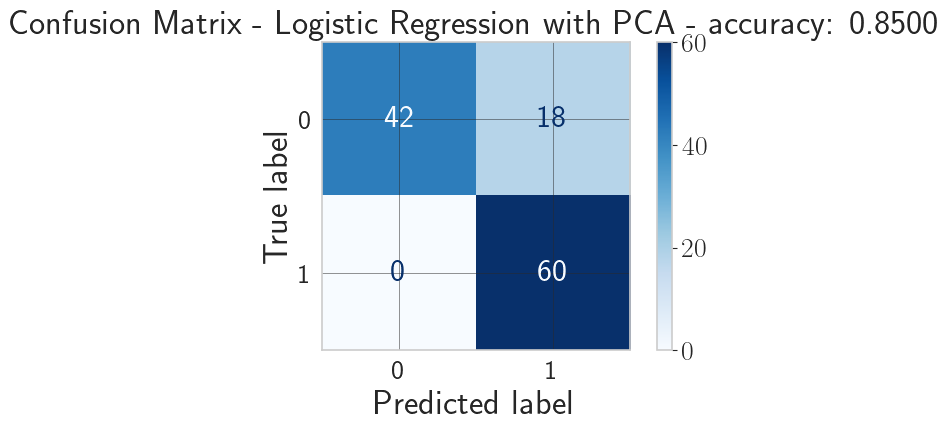

In [16]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()